In [16]:
# coding: utf-8
# Assumes inputs are pandas data frames
# Assumes the last column of data is the output dimension

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import Binarizer
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.utils import shuffle 
import matplotlib.pyplot as plt
import re

####################
####import data#####
print('\n ############ Import data ############# \n')
####################

my_data = pd.read_csv('wine.csv')
#encode class into 0/1 for easier handling by classification algorithm

my_data.replace(to_replace=r'high', value=1, regex=True, inplace=True)
my_data.replace(to_replace=r'low', value=0, regex=True, inplace=True)



 ############ Import data ############# 



In [2]:
# coding: utf-8

# Assumes inputs are pandas data frames
# Assumes the last column of data is the output dimension

##############################
# PART 1
print('\n ############ PART 1 ############# \n')
##############################

# Logistic Regression
# Assumes the last column of data is the output dimension
def get_pred_logreg(train,test):
    n,m = train.shape # number of rows and columns
    X_train = train.iloc[:,:m-1] # get training input data (log crime rate)
    y_train = train.iloc[:,m-1:] # get training output data (housing price)
    x_test = test.iloc[:,:m-1] # get test input data
    y_test = test.iloc[:,m-1:] # get test input data
    logreg = LogisticRegression()

    logreg.fit(X_train, y_train) 
    y_pred = logreg.predict(x_test)
    y_pred_prob = logreg.predict_proba(x_test)
    return y_pred_prob[:,1].tolist(), y_test #return predicted and actual values for output

# Support Vector Machine
# Assumes the last column of data is the output dimension
def get_pred_svm(train,test):
    n,m = train.shape # number of rows and columns
    X_train = train.iloc[:,:m-1] # get training input data (log crime rate)
    y_train = train.iloc[:,m-1:] # get training output data (housing price)
    x_test = test.iloc[:,:m-1] # get test input data
    y_test = test.iloc[:,m-1:] # get test input data

    svm = SVC(gamma='auto',kernel='rbf', probability = True)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(x_test)
    y_pred_prob = svm.predict_proba(x_test)
    return y_pred_prob[:,1].tolist(), y_test #return predicted and actual values for output

# Naive Bayes
# Assumes the last column of data is the output dimension
def get_pred_nb(train,test):
    n,m = train.shape # number of rows and columns
    X_train = train.iloc[:,:m-1] # get training input data (log crime rate)
    y_train = train.iloc[:,m-1:] # get training output data (housing price)
    x_test = test.iloc[:,:m-1] # get test input data
    y_test = test.iloc[:,m-1:] # get test input data
    nb = GaussianNB()
    nb.fit(X_train, y_train)
    y_pred = nb.predict(x_test)
    y_pred_prob = nb.predict_proba(x_test)
    return y_pred_prob[:,1].tolist(), y_test #return predicted and actual values for output


# k-Nearest Neighbor
# Assumes the last column of data is the output dimension
# Hint: you might want to use predit_proba to get predicted probabilities
def get_pred_knn(train,test,k):
    n,m = train.shape # number of rows and columns
    X_train = train.iloc[:,:m-1] # get training input data (log crime rate)
    y_train = train.iloc[:,m-1:] # get training output data (housing price)
    x_test = test.iloc[:,:m-1] # get test input data
    y_test = test.iloc[:,m-1:] # get test input data
    neighbors = KNeighborsClassifier(n_neighbors=int(k)) # initialize KNN
    neighbors.fit(X_train, y_train) # fit the model to the training data
    y_pred = neighbors.predict(x_test)
    y_pred_prob = neighbors.predict_proba(x_test)
    return y_pred_prob[:,1].tolist(), y_test #return predicted and actual values for output

# k-Nearest Neighbor
# Assumes the last column of data is the output dimension
# ***This function is used for Problem 4 part A
#The following returns the training and test data predictions
def get_pred_train_knn(train,test,k):
    n,m = train.shape # number of rows and columns
    X_train = train.iloc[:,:m-1] # get training input data (log crime rate)
    y_train = train.iloc[:,m-1:] # get training output data (housing price)
    x_test = test.iloc[:,:m-1] # get test input data
    y_test = test.iloc[:,m-1:] # get test input data
    neighbors = KNeighborsClassifier(n_neighbors=int(k)) # initialize KNN
    neighbors.fit(X_train, y_train) # fit the model to the training data
    y_pred = neighbors.predict(x_test)
    y_pred_prob = neighbors.predict_proba(x_test) #find predicted prob for test
    y_train_prob = neighbors.predict_proba(X_train) #find the predicted prob for training
    
    y_test_t = y_test.values.tolist()
    y_t_flat = [e for sl in y_test_t for e in sl]
    d={'Predicted_Test':y_pred_prob[:,1].tolist(), 'Test_True': y_t_flat}#, 'Test_True': y_test.values.tolist()}
    df_test=pd.DataFrame(data=d) # create a dataframe with the test pred val column 0, test real val column1
    
    y_t = y_train.values.tolist()
    y_flat = [e for sl in y_t for e in sl]
    f={'Predicted_Train': y_train_prob[:,1].tolist(), 'Test_True': y_flat}#, 'Train_True': y_train}
    df_train=pd.DataFrame(data=f) # create a dataframe with the train pred val column 0, train real val column1
    return df_test,df_train #return predicted and actual values for output



 ############ PART 1 ############# 



In [18]:
##############################
# PART 2
print('\n ############ PART 2 ############# \n')
##############################

#your implementation of do_cv_class goes here
#input: dataframe, integer number of folds, string model_name
#output: dataframe with (y_pred, y_true,folds) 
def do_cv_class(df, num_folds, model_name):
    m_names = {"logreg":get_pred_logreg,"svm": get_pred_svm,"nb" : get_pred_nb,"knn": get_pred_knn}
    k_fold = KFold(num_folds, shuffle=True, random_state=0) #initialize kfold model
    n,m=df.shape
    indices = range(n) 
    fold_num = []
    y_pred_results =[]  
    y_true_results =[]  
    k=1
    if('nn' in str(model_name)): #check to see if the model being called is knn
        n_idx = str(model_name).find('n')
        neighs = model_name[0:n_idx]
        model_name="knn"
        for train_indices, test_indices in k_fold.split(indices):
            y_pred, y_true = m_names.get(model_name)(df.iloc[train_indices],df.iloc[test_indices],neighs)
            list_of_k = [k for i in range(len(test_indices))]
            y_pred_results.extend(y_pred) # store y_predictions for each fold in list
            y_true_results.extend(y_true.values.tolist()) # store actual y for fold in list
            fold_num.extend(list_of_k)
            k+=1
    else:
        for train_indices, test_indices in k_fold.split(indices):
            y_pred, y_true = m_names.get(model_name)(df.iloc[train_indices],df.iloc[test_indices])
            list_of_k = [k for i in range(len(test_indices))]
            y_pred_results.extend(y_pred) # store y_predictions for each fold in list
            y_true_results.extend(y_true.values.tolist()) # store actual y for fold in list
            fold_num.extend(list_of_k) 
            k+=1
    y_flat = [e for sl in y_true_results for e in sl]
    d = {'Predicted':y_pred_results,'Actual':y_flat,'Fold':fold_num}
    df2 = pd.DataFrame(data=d) #create dataframe, column 0: predicted y, column 1: actual y
    return df2




 ############ PART 2 ############# 



In [9]:
##############################
# PART 3
print('\n ############ PART 3 ############# \n')
##############################

#input prediction file the first column of which is prediction value
#the 2nd column is true label (0/1)
#cutoff is a numeric value, default is 0.5
def get_metrics(pred, cutoff=0.5):
    n,m = pred.shape
    pred.iloc[:,0] = (pred.iloc[:,0]>=cutoff).astype('int')
    y_pred = pred.iloc[:,0].to_numpy()
    y_true = pred.iloc[:,1].to_numpy()
    tp=0 # true positive
    tn=0 # true negative
    fp=0 # false positive
    fn=0 # false negative
    for i in range(n): 
        if y_true[i] == y_pred[i] ==1:
            tp+=1
        if y_true[i] == y_pred[i] ==0:
            tn+=1
        if y_true[i] != y_pred[i]:
            if y_true[i] == 0:
                fp +=1
            if y_true[i] ==1:
                fn +=1
        
    tpr = tp/(tp+fn) # True Positive Rate aka Recall
    fpr = fp/(tn+fp) # False Positive Rate
    tnr = 1-fpr # True Negative Rate aka specificity
    fnr = 1 - tpr # False Negative Rate
    acc = (tp+tn)/n # accuracy
    precision = tp/(tp+fp)
    
    d = {'TPR/Recall':[tpr],'FPR':[fpr],'ACC':[acc],'Precision':[precision]}
    df = pd.DataFrame(d)
    return df



 ############ PART 3 ############# 




 ############ PART 4 ############# 



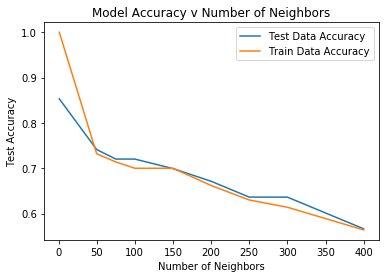

In [10]:
##############################
# PART 4
print('\n ############ PART 4 ############# \n')
##############################

n,m = my_data.shape

k = [1, 50,75, 100, 150, 200,250,300,400] #number of neighbors to test

test_acc = []
train_acc = []
l,m = my_data.shape
df_shuf = shuffle(my_data) # shuffle the data before splitting
train = df_shuf[:500] # use this as training set
test=df_shuf[500:] # use there as test set

# run the kNN model for the different # of neighbors 
# find the accuracy for each model for training/test
for p in k:
    df_test, df_train = get_pred_train_knn(train,test, p)
    met = get_metrics(df_test.iloc[:, 0:2])
    met_train = get_metrics(df_train.iloc[:, 0:2])
    train_acc.extend(met_train.iloc[:,2])
    test_acc.extend(met.iloc[:,2])

#plot the accuracy for training and test data for given model
plt.plot(k, test_acc, label = "Test Data Accuracy")
plt.plot(k, train_acc, label = "Train Data Accuracy")
plt.xlabel('Number of Neighbors')
plt.ylabel('Test Accuracy')
plt.title('Model Accuracy v Number of Neighbors')
plt.legend()
plt.show()


Stopped testing because the number of neighbors is too large or too small for the sample size.


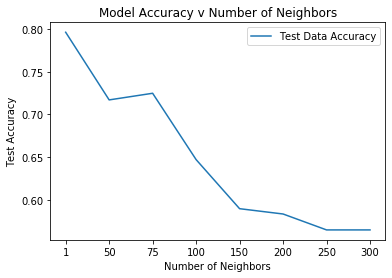

In [20]:
#Check the predictions for test data for kNN using do_cv_class
#Due to prior specifications of do_cv_class does not include training data results
# see above for training versus test data model fit for kNN

n = ['1nn', '50nn','75nn', '100nn', '150nn', '200nn','250nn','300nn','400nn'] #number of neighbors to test
n_num = []#[1, 50,75, 100, 150, 200,250,300,400] #number of neighbors to test
test_acc = []
train_acc = []  
    

for i in n:
    try:
        tmp = do_cv_class(my_data,2,i) # returns pandas dataframe
        df = get_metrics(tmp.iloc[:, 0:2])
        test_acc.extend(df.iloc[:,2])
        n_num.append(re.sub('[^0-9]', '', i))
    except ValueError:
        print("Stopped testing because the number of neighbors is too large or too small for the sample size.")
plt.plot(n_num, test_acc, label = "Test Data Accuracy")
plt.xlabel('Number of Neighbors')
plt.ylabel('Test Accuracy')
plt.title('Model Accuracy v Number of Neighbors')
plt.legend()
plt.show()

In [21]:
#test cases for "do_cv_class" and "get_metrics" functions
#acc_all_models =[]

print('-------------------')
print ('logistic regression')
print('-------------------')
tmp = do_cv_class(my_data,10,'logreg') # returns pandas dataframe
print(get_metrics(tmp.iloc[:, 0:2]))

print('-------------------')
print('naieve Bayes')
print('-------------------')
tmp = do_cv_class(my_data,10,'nb') # returns pandas dataframe
print(get_metrics(tmp.iloc[:, 0:2]))

print('-------------------')
print('svm')
print('-------------------')
tmp = do_cv_class(my_data,10,'svm') # returns pandas dataframe
print(get_metrics(tmp.iloc[:, 0:2]))

print('-------------------')
print('default')
print('-------------------')
#set up the information for the default model
n,m = my_data.shape
def_mode = my_data.iloc[:,m-1:].mode() # find the most common value for y. Works bc y is binary
x1 = np.array(def_mode)  #create array of one element containing mode
x2 = np.repeat(x1,n) # create a list with mode repeating n number of times
m = my_data.iloc[:,m-1:].copy() #create a dataframe containing the actual values for y
m.insert(0, 'Predicted',x2) # insert the actual information in the front 
print(get_metrics(m))


-------------------
logistic regression
-------------------
   TPR/Recall       FPR       ACC  Precision
0    0.862259  0.296429  0.793157   0.790404
-------------------
naieve Bayes
-------------------
   TPR/Recall  FPR       ACC  Precision
0    0.878788  0.2  0.844479   0.850667
-------------------
svm
-------------------
   TPR/Recall       FPR       ACC  Precision
0    0.848485  0.246429  0.807154   0.816976
-------------------
default
-------------------
   TPR/Recall  FPR       ACC  Precision
0         1.0  1.0  0.564541   0.564541
